# Chronic Conditions Stratification – CCHS 2019–2020

This notebook demonstrates analysis of chronic condition prevalence using the Canadian Community Health Survey (CCHS) 2019–2020 dataset.  
It includes data preparation, stratification by demographic and socioeconomic variables, and calculation of prevalence metrics.


**Data Disclaimer**  
This notebook demonstrates analysis performed on the Canadian Community Health Survey (CCHS) 2019–2020 dataset.  
Due to licensing restrictions, raw and individual-level data are not included in this repository.  
The outputs displayed are aggregated summaries only.  
Replace the dataset path in the code below with your own version of the CCHS data if you wish to replicate the analysis.


### Variable Labels
The following dictionary maps chronic condition codes from the CCHS dataset to human-readable labels for easier interpretation in analysis and visualization.


In [6]:
# Mapping variable codes to human-readable labels
conditions = {
    'Sleep Apnea': 'CCC_065',
    'High Blood Pressure': 'CCC_070',
     'High Cholesterol': 'CCC_075',
    'Diabetes': 'CCC_095',
    'Chronic Fatigue Syndrome': 'CCC_185',
    'Mood Disorder': 'CCC_195',
    'Anxiety Disorder': 'CCC_200',
    'Respiratory Condition (Asthma or COPD)': 'CCCDGRSP',
    'Musculoskeletal Condition': 'CCCDGSKL',
    'Cardiovascular Condition': 'CCCDGCAR'
}

# Age
age_labels = {1: '12–17', 2: '18–34', 3: '35–49', 4: '50–64', 5: '65+'}
age_order = ['12–17', '18–34', '35–49', '50–64', '65+']

# Sex
sex_labels = {1: 'Male', 2: 'Female'}
sex_order = ['Female', 'Male']

# Income
income_labels = {
    1: 'No income or less than $20,000',
    2: '$20,000–39,999',
    3: '$40,000–59,999',
    4: '$60,000–79,999',
    5: '$80,000 or more'
}
income_order = list(income_labels.values())

# Province
province_labels = {
    10: 'Newfoundland and Labrador', 11: 'Prince Edward Island', 12: 'Nova Scotia',
    13: 'New Brunswick', 24: 'Quebec', 35: 'Ontario', 46: 'Manitoba',
    47: 'Saskatchewan', 48: 'Alberta', 59: 'British Columbia',
    60: 'YUKON/NORTHWEST/NUNAVUT TERRITORIES'
}


### Stratify Prevalence Function
This function calculates the percentage of individuals reporting a condition (value = 1) 
within each demographic group. It also applies human-readable labels and optionally orders 
the groups for consistent visualization.


In [7]:
def stratify_prevalence(df, condition_col, group_col, label_map, group_order=None, label_name='Group'):
    """
    Calculate prevalence (%) of a given condition within specified demographic groups.

    Parameters:
    df : pandas.DataFrame
        The input dataset.
    condition_col : str
        Column indicating condition status (1 = yes, 2 = no).
    group_col : str
        Column to group by (e.g., age group, sex, income).
    label_map : dict
        Mapping of group codes to human-readable labels.
    group_order : list, optional
        Order to display groups (if applicable).
    label_name : str, default='Group'
        Name for the group column in the output.

    Returns:
    pandas.DataFrame
        A labeled DataFrame with prevalence percentages by group.
    """
    data = df[df[condition_col].isin([1, 2])].copy()
    data = data.dropna(subset=[group_col])
    data[label_name] = data[group_col].map(label_map)

    grouped = data.groupby(label_name)[condition_col].apply(
        lambda x: (x == 1).sum() / x.count() * 100
    ).reset_index()

    grouped.columns = [label_name, 'Prevalence (%)']

    if group_order:
        grouped[label_name] = pd.Categorical(grouped[label_name], categories=group_order, ordered=True)
        grouped = grouped.sort_values(label_name)

    return grouped.reset_index(drop=True)


### Stratified Prevalence Analysis
The following code loops through all chronic condition variables and calculates their prevalence 
across demographic groups (age, sex, income, and province). Results are stored in a nested dictionary 
for easy downstream visualization and reporting.


In [8]:
import pandas as pd
# List of stratification setups
stratifications = [
    ('DHHGAGE', age_labels, age_order, 'Age Group'),
    ('DHH_SEX', sex_labels, sex_order, 'Sex'),
    ('INCDGHH', income_labels, income_order, 'Income Group'),
    ('GEOGPRV', province_labels, None, 'Province')
]
# Replace 'df' with your actual cleaned DataFrame name
df = pd.read_csv("PATH_TO_YOUR_DATA.csv")

# Store all results in a nested dictionary
all_results = {}

for cond_name, cond_code in conditions.items():
    print(f"\n===== {cond_name.upper()} =====")
    cond_results = {}

    for group_col, label_map, group_order, label_name in stratifications:
        try:
            result = stratify_prevalence(
                df=df,
                condition_col=cond_code,
                group_col=group_col,
                label_map=label_map,
                group_order=group_order,
                label_name=label_name
            )
            cond_results[label_name] = result
            print(f"\n--- Prevalence by {label_name} ---")
            display(result)
        except Exception as e:
            print(f"❌ Could not process {cond_name} by {label_name}: {e}")
    
    all_results[cond_name] = cond_results



===== SLEEP APNEA =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,0.621697
1,18–34,2.677692
2,35–49,9.287630
3,50–64,26.893712
4,65+,45.077113



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,27.178423
1,Male,27.277732



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",30.119068
1,"$20,000–39,999",37.964032
2,"$40,000–59,999",32.621237
3,"$60,000–79,999",29.181446
4,"$80,000 or more",20.707943



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,25.472431
1,British Columbia,21.710798
2,Manitoba,32.537591
3,New Brunswick,36.888308
4,Newfoundland and Labrador,40.274643
5,Nova Scotia,35.451148
6,Ontario,24.842437
7,Prince Edward Island,37.484885
8,Quebec,21.235177
9,Saskatchewan,34.984719



===== HIGH BLOOD PRESSURE =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,0.262143
1,18–34,1.414075
2,35–49,7.661650
3,50–64,27.195494
4,65+,52.556670



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,29.675315
1,Male,30.631346



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",30.998161
1,"$20,000–39,999",42.971114
2,"$40,000–59,999",36.847212
3,"$60,000–79,999",32.875034
4,"$80,000 or more",22.490115



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,26.756314
1,British Columbia,23.057933
2,Manitoba,36.031008
3,New Brunswick,43.443387
4,Newfoundland and Labrador,47.793427
5,Nova Scotia,39.978697
6,Ontario,26.790216
7,Prince Edward Island,44.369261
8,Quebec,23.774060
9,Saskatchewan,38.322871



===== HIGH CHOLESTEROL =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,18–34,1.625963
1,35–49,6.072437
2,50–64,20.121184
3,65+,29.003898



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,17.406898
1,Male,21.319909



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",21.442291
1,"$20,000–39,999",23.348318
2,"$40,000–59,999",21.642058
3,"$60,000–79,999",20.473798
4,"$80,000 or more",16.066968



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,17.587331
1,British Columbia,14.302243
2,Manitoba,21.933884
3,New Brunswick,24.906771
4,Newfoundland and Labrador,31.358410
5,Nova Scotia,24.592620
6,Ontario,18.201970
7,Prince Edward Island,24.013158
8,Quebec,15.815448
9,Saskatchewan,21.698274



===== DIABETES =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,0.186509
1,18–34,0.345125
2,35–49,1.762546
3,50–64,6.928193
4,65+,17.092621



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,8.023072
1,Male,10.868660



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",10.842736
1,"$20,000–39,999",14.559775
2,"$40,000–59,999",11.680795
3,"$60,000–79,999",10.034002
4,"$80,000 or more",6.351694



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,8.660387
1,British Columbia,5.951575
2,Manitoba,10.474528
3,New Brunswick,13.276891
4,Newfoundland and Labrador,16.714808
5,Nova Scotia,13.123979
6,Ontario,8.480328
7,Prince Edward Island,14.132554
8,Quebec,7.686157
9,Saskatchewan,10.383148



===== CHRONIC FATIGUE SYNDROME =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,0.277906
1,18–34,0.943644
2,35–49,1.589570
3,50–64,2.583060
4,65+,2.151549



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,2.319574
1,Male,1.326443



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",4.317269
1,"$20,000–39,999",2.996646
2,"$40,000–59,999",2.048853
3,"$60,000–79,999",1.715569
4,"$80,000 or more",1.119539



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,1.750000
1,British Columbia,1.869852
2,Manitoba,1.687829
3,New Brunswick,2.833178
4,Newfoundland and Labrador,1.634110
5,Nova Scotia,2.201314
6,Ontario,1.936562
7,Prince Edward Island,1.520270
8,Quebec,1.714196
9,Saskatchewan,1.865252



===== MOOD DISORDER =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,4.952939
1,18–34,12.713199
2,35–49,11.493568
3,50–64,12.065222
4,65+,7.219380



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,11.451627
1,Male,7.150409



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",20.063588
1,"$20,000–39,999",11.341169
2,"$40,000–59,999",9.971477
3,"$60,000–79,999",8.620807
4,"$80,000 or more",7.434816



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,10.910031
1,British Columbia,10.163773
2,Manitoba,9.158531
3,New Brunswick,9.031657
4,Newfoundland and Labrador,7.750047
5,Nova Scotia,11.605245
6,Ontario,10.803106
7,Prince Edward Island,8.656860
8,Quebec,6.296160
9,Saskatchewan,9.983923



===== ANXIETY DISORDER =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,10.898130
1,18–34,15.359906
2,35–49,11.977367
3,50–64,10.396451
4,65+,5.975979



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,11.610875
1,Male,6.785279



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",18.979933
1,"$20,000–39,999",10.633273
2,"$40,000–59,999",9.393369
3,"$60,000–79,999",8.337303
4,"$80,000 or more",7.927559



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,8.950724
1,British Columbia,9.206192
2,Manitoba,8.692284
3,New Brunswick,10.527296
4,Newfoundland and Labrador,8.577327
5,Nova Scotia,11.032281
6,Ontario,10.324039
7,Prince Edward Island,7.861104
8,Quebec,9.053757
9,Saskatchewan,7.546259



===== RESPIRATORY CONDITION (ASTHMA OR COPD) =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,6.195275
1,18–34,6.029838
2,35–49,5.134723
3,50–64,6.951292
4,65+,11.439906



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,10.031694
1,Male,6.683578



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",12.173751
1,"$20,000–39,999",11.493313
2,"$40,000–59,999",9.430008
3,"$60,000–79,999",8.509581
4,"$80,000 or more",6.851594



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,10.301109
1,British Columbia,6.175018
2,Manitoba,7.728758
3,New Brunswick,8.137903
4,Newfoundland and Labrador,10.958904
5,Nova Scotia,11.889676
6,Ontario,7.461439
7,Prince Edward Island,12.546399
8,Quebec,8.903514
9,Saskatchewan,8.039685



===== MUSCULOSKELETAL CONDITION =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,18–34,1.468788
1,35–49,7.309056
2,50–64,33.323585
3,65+,54.120406



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,40.552762
1,Male,26.702036



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",41.091251
1,"$20,000–39,999",47.909551
2,"$40,000–59,999",40.263885
3,"$60,000–79,999",35.740659
4,"$80,000 or more",25.847594



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,33.788621
1,British Columbia,28.775701
2,Manitoba,37.967089
3,New Brunswick,43.017788
4,Newfoundland and Labrador,49.524195
5,Nova Scotia,46.577983
6,Ontario,30.910356
7,Prince Edward Island,45.519713
8,Quebec,27.949364
9,Saskatchewan,41.375605



===== CARDIOVASCULAR CONDITION =====

--- Prevalence by Age Group ---


,Age Group,Prevalence (%)
0,12–17,0.220751
1,18–34,0.448191
2,35–49,0.656522
3,50–64,3.371341
4,65+,19.757167



--- Prevalence by Sex ---


,Sex,Prevalence (%)
0,Female,7.572027
1,Male,12.078848



--- Prevalence by Income Group ---


,Income Group,Prevalence (%)
0,"No income or less than $20,000",11.181703
1,"$20,000–39,999",16.044411
2,"$40,000–59,999",12.131070
3,"$60,000–79,999",10.502283
4,"$80,000 or more",6.148753



--- Prevalence by Province ---


,Province,Prevalence (%)
0,Alberta,8.113108
1,British Columbia,7.239274
2,Manitoba,10.409639
3,New Brunswick,15.301935
4,Newfoundland and Labrador,15.321477
5,Nova Scotia,13.307494
6,Ontario,7.859042
7,Prince Edward Island,16.457565
8,Quebec,8.689320
9,Saskatchewan,12.059621


### Export Results
The aggregated stratified prevalence tables are exported to a multi-sheet Excel file.  
Each chronic condition has its own sheet, with tables separated by headers and spacing for readability.


**Note:** This export is optional and intended for local use.  
The exported Excel file is not included in this repository but can be generated by running this notebook locally with the appropriate dataset.


In [9]:
import pandas as pd

# Final export file name
excel_filename = "Chronic_Condition_Stratified_Prevalence.xlsx"

# Export each chronic condition to a sheet, with nicely spaced titles
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    for condition, strat_tables in all_results.items():
        sheet_name = condition[:31]  # Excel sheet name limit
        startrow = 0

        for strat_name, table in strat_tables.items():
            # Write the stratification header
            pd.DataFrame([[f"{strat_name} stratification"]]).to_excel(
                writer,
                sheet_name=sheet_name,
                index=False,
                header=False,
                startrow=startrow
            )

            # Write the table below it
            table.to_excel(
                writer,
                sheet_name=sheet_name,
                index=False,
                startrow=startrow + 1
            )

            # Add padding before next block
            startrow += len(table) + 4

print(f"✅ Excel file saved as: {excel_filename}")


✅ Excel file saved as: Chronic_Condition_Stratified_Prevalence.xlsx


### Example Visualization
The chart below shows an example of stratified prevalence for one condition (Diabetes) by age group.  
This demonstrates how aggregated results can be visualized for reporting and presentation purposes.


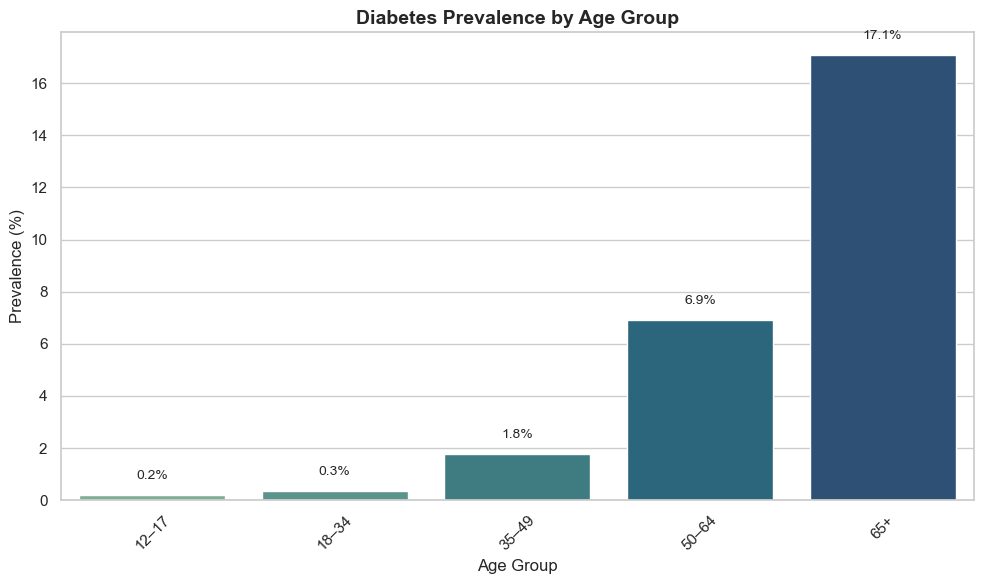

In [10]:
# Example visualization of diabetes prevalence by age group

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Replace with your actual condition variable
condition_col = 'CCC_095'
condition_name = 'Diabetes'

# Run the stratification for Age Group
result = stratify_prevalence(
    df=df,
    condition_col=condition_col,
    group_col='DHHGAGE',
    label_map=age_labels,
    group_order=age_order,
    label_name='Age Group'
)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=result,
    x='Age Group',
    y='Prevalence (%)',
    hue='Age Group',
    palette='crest',
    dodge=False,
    legend=False,
    order=age_order  # ensures correct label order
)

# Add value annotations on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Titles and labels
plt.title(f"{condition_name} Prevalence by Age Group", fontsize=14, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
